Importing libraries containing the iris dataset

In [89]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [90]:
iris_data = load_iris()

In [91]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target_names[iris_data.target]

In [112]:
df.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [93]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [94]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


Visualizing the Data

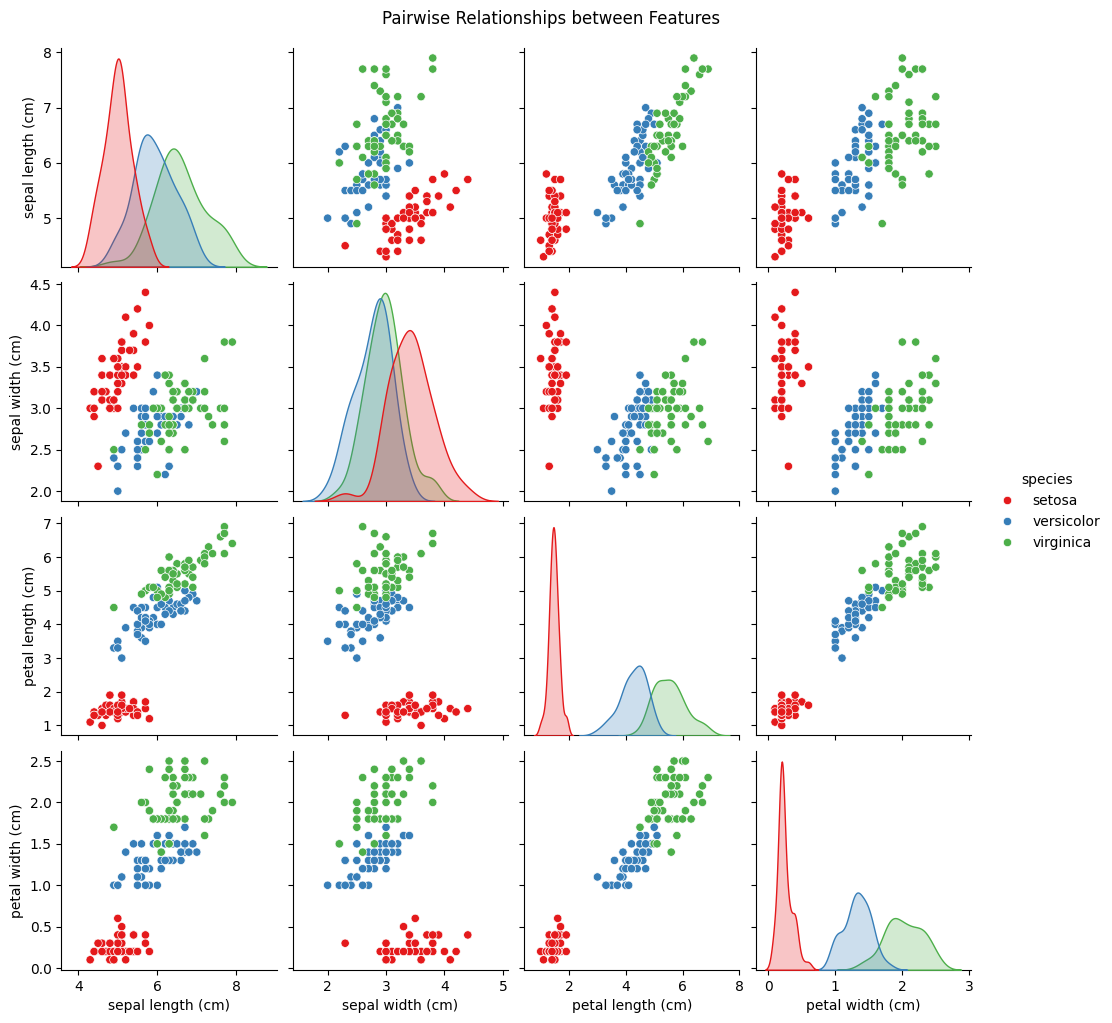

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
## 1. Pair Plot
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle('Pairwise Relationships between Features', y=1.02)
plt.show()


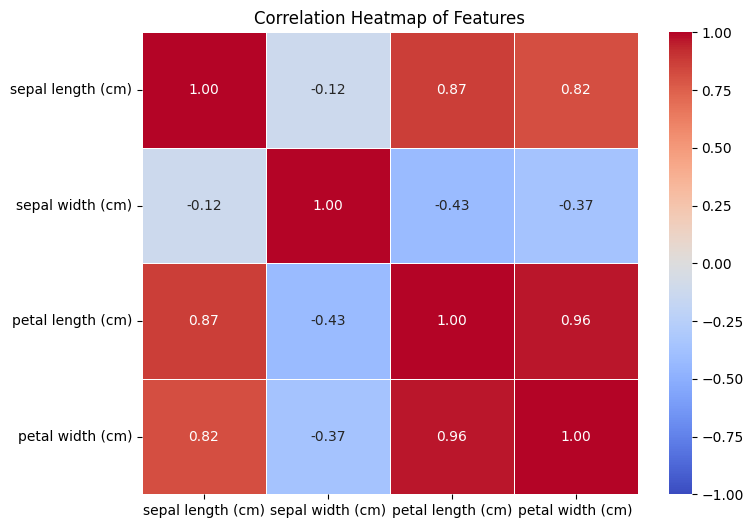

In [96]:
##2. Plotting a heatmap based on the correlation matrix
correlation_matrix = df.drop('species', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

<ipython-input-97-96e90ed14b00>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette='Set1')
<ipython-input-97-96e90ed14b00>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette='Set1')
<ipython-input-97-96e90ed14b00>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette='Set1')
<ipython-input-97-96e90ed14b00>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

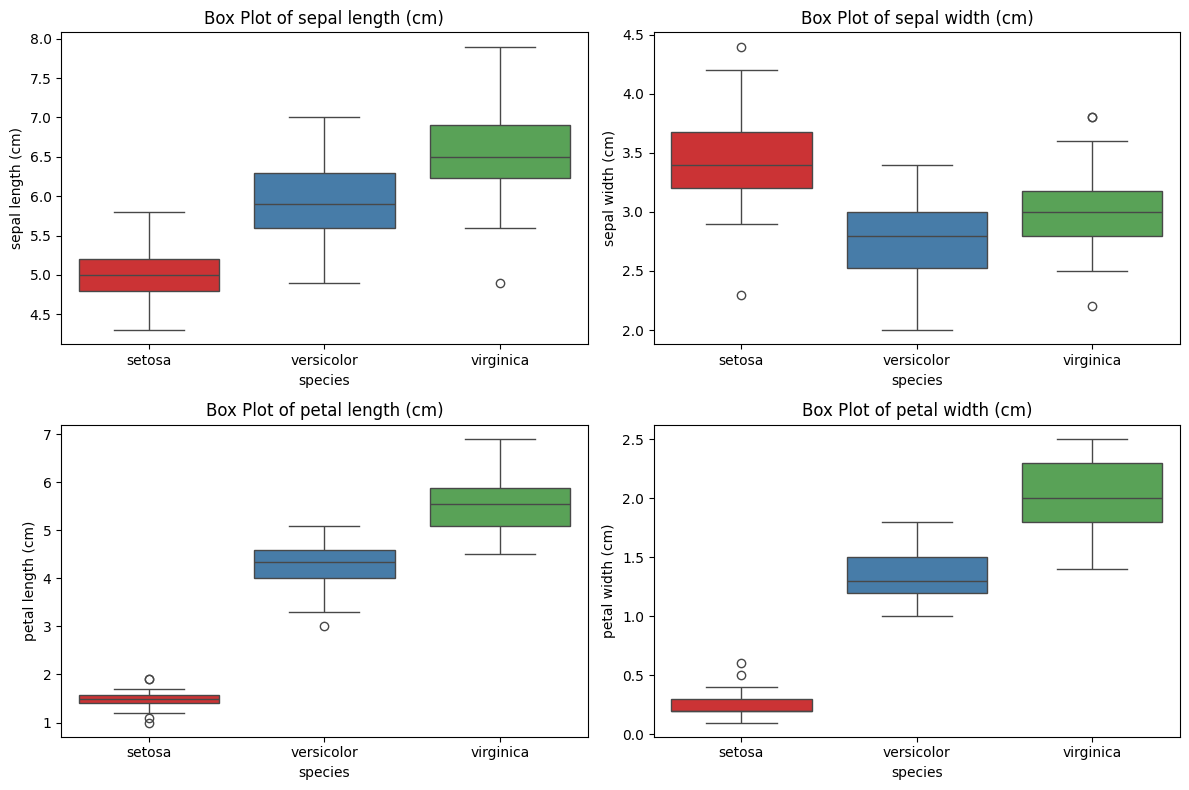

In [97]:
# 2. Box plots
plt.figure(figsize=(12, 8))
features = df.columns[:-1]
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df, palette='Set1')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()



<ipython-input-98-bd2deb65a49f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=df, palette='Set1')
<ipython-input-98-bd2deb65a49f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=df, palette='Set1')
<ipython-input-98-bd2deb65a49f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=feature, data=df, palette='Set1')
<ipython-input-98-bd2deb65a49f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

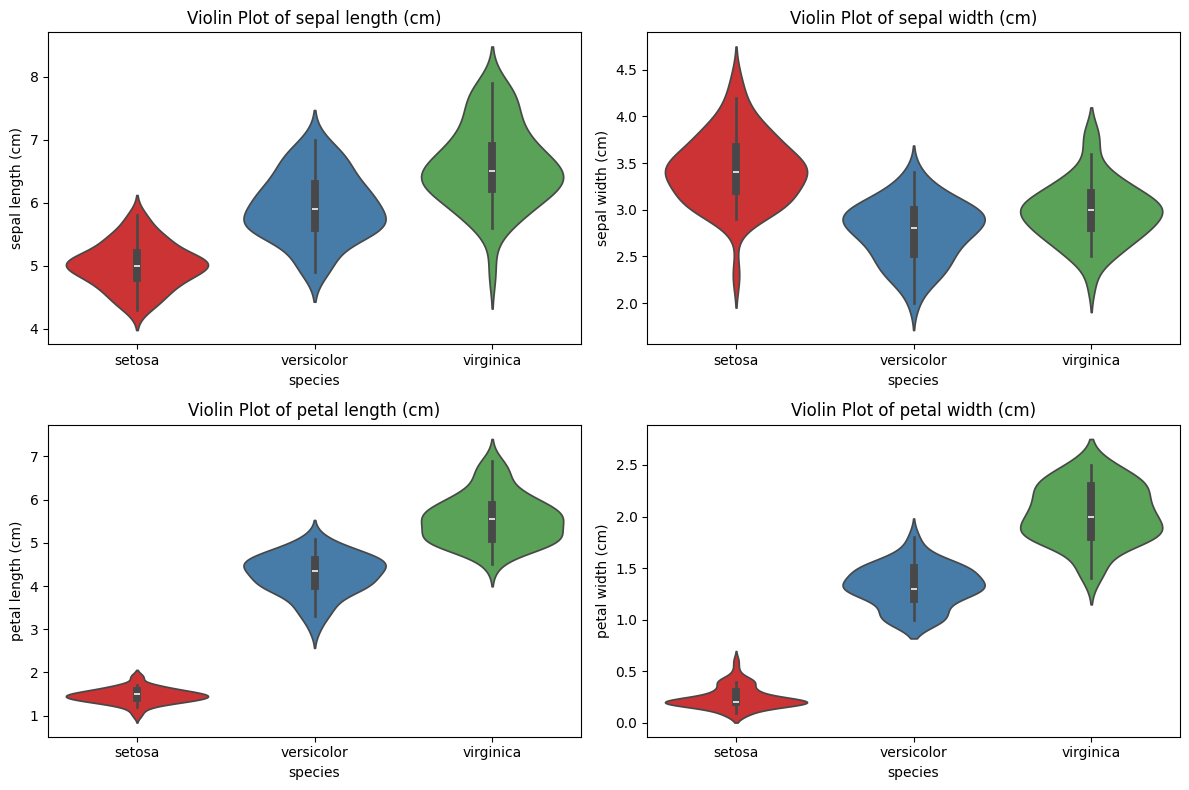

In [98]:
# 3. Violin plots for each feature by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=df, palette='Set1')
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


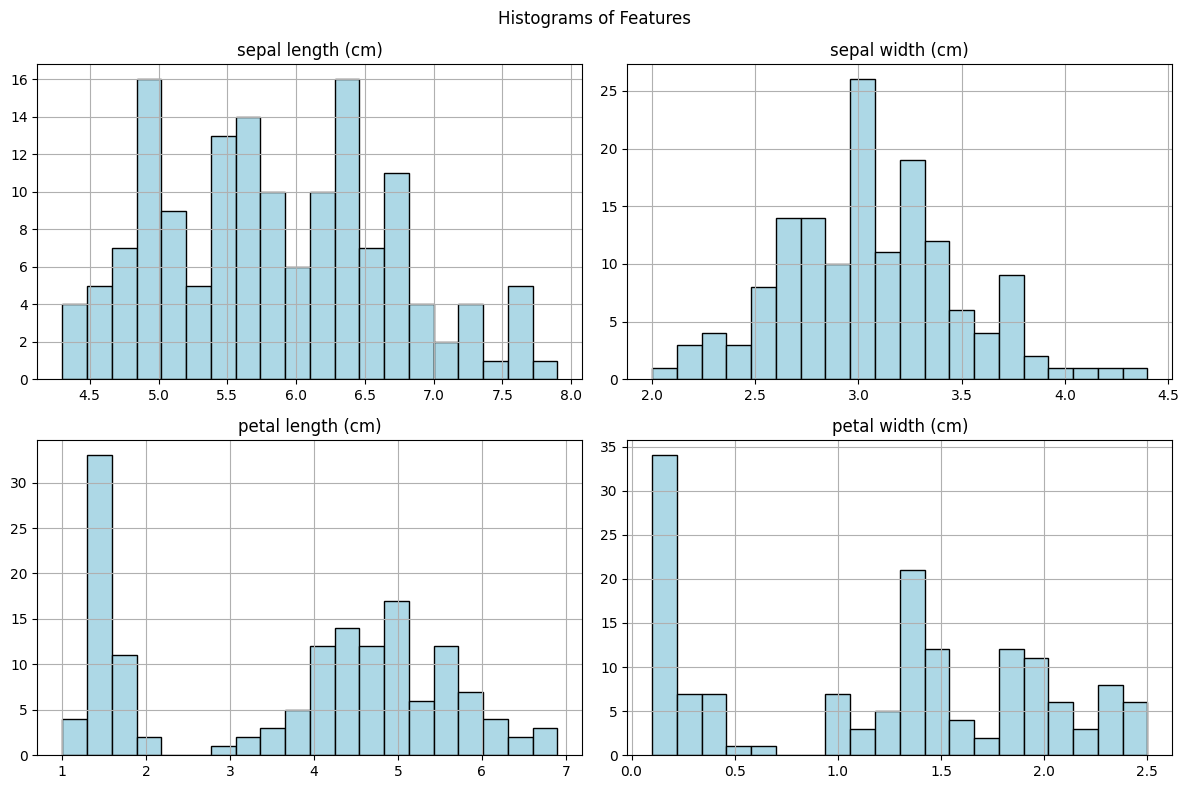

In [99]:
# 4.histograms
df.drop('species', axis=1).hist(bins=20, figsize=(12, 8), color='lightblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


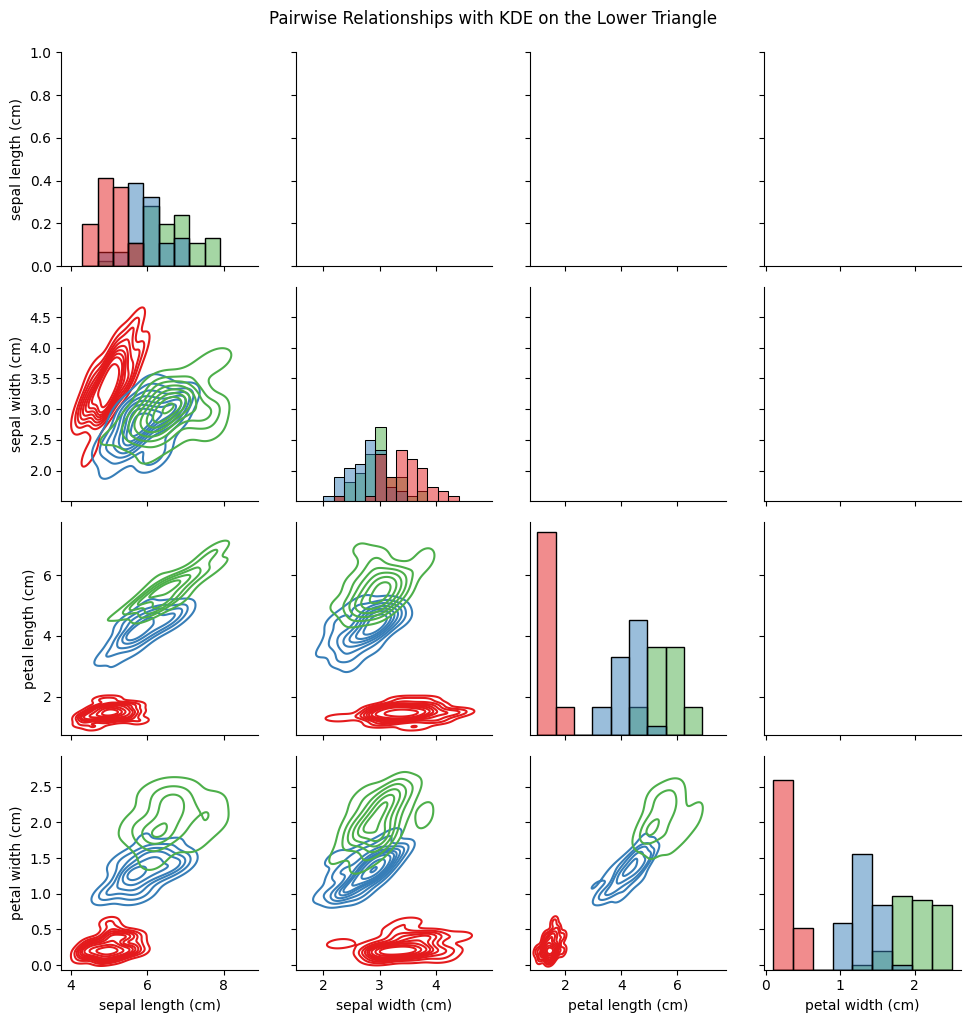

In [100]:
# 5.PairGrid for pairwise relationships with histograms on the diagonal
sns.PairGrid(df, hue='species', palette='Set1').map_lower(sns.kdeplot, cmap='Blues_d').map_diag(sns.histplot)
plt.suptitle('Pairwise Relationships with KDE on the Lower Triangle', y=1.02)
plt.show()


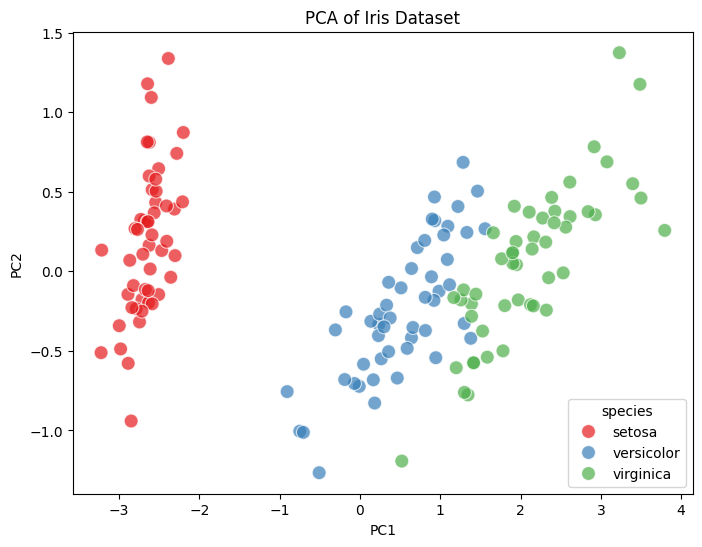

In [101]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dataset to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop('species', axis=1))

# Create DataFrame with the principal components and species label
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']

# Plot PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA of Iris Dataset')
plt.show()


Standardizing the data aka setting the mean to 0 and standard deviation to 1

In [102]:
scaler = StandardScaler()
df_scaled = df.drop('species', axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df.columns[:-1])

In [111]:
df_scaled['species'] = df['species']
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


Splitting the  Data for test and training

In [104]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop('species', axis=1)
y = df_scaled['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Training the Decision Tree Classifier Model with our training data

In [105]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

Testing out our model

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



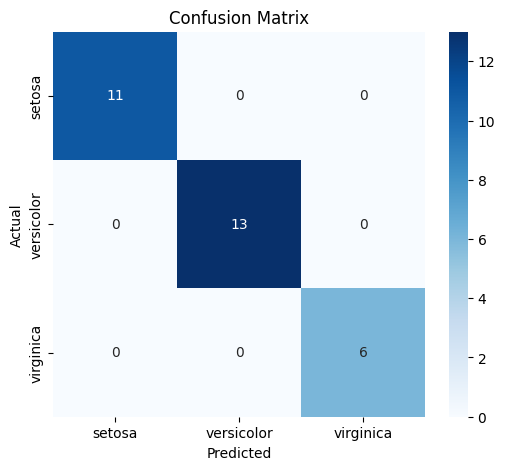

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [108]:
new_data = [[5.1, 3.5, 1.4, 0.2]]
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print(f"Predicted species: {prediction[0]}")

Predicted species: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


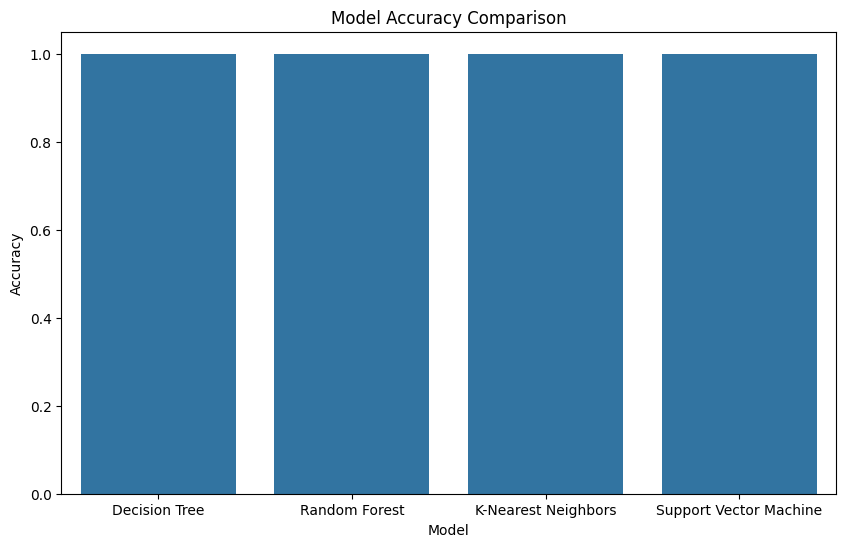

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define models to compare
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=0)
}

# Dictionary to store model accuracies
model_accuracies = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

# Compare model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


In [86]:
import streamlit as st

# Streamlit app code
st.title("Iris Flower Prediction")
sepal_length = st.slider("Sepal Length", 4.0, 8.0)
sepal_width = st.slider("Sepal Width", 2.0, 4.5)
petal_length = st.slider("Petal Length", 1.0, 7.0)
petal_width = st.slider("Petal Width", 0.1, 2.5)

input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
scaled_input = scaler.transform(input_data)
prediction = model.predict(scaled_input)

st.write(f"Predicted Species: {prediction[0]}")


ModuleNotFoundError: No module named 'streamlit'